In [1]:
#Importing required Packages for CASE STUDY

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns',None)

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Reading the application_data.csv file

df = pd.read_csv('application_data.csv')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,REG_CITY_NOT_LIVE_CITY,REG_CITY_NOT_WORK_CITY,LIVE_CITY_NOT_WORK_CITY,ORGANIZATION_TYPE,EXT_SOURCE_1,EXT_SOURCE_2,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,APARTMENTS_MODE,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,APARTMENTS_MEDI,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120,NaN,1,1,0,1,1,0,Laborers,1.0,2,2,WEDNESDAY,10,0,0,0,0,0,0,Business Entity Type 3,0.083037,0.262949,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0252,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0250,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,reg oper account,block of flats,0.0149,"Stone, brick",No,2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291,NaN,1,1,0,1,1,0,Core staff,2.0,1,1,MONDAY,11,0,0,0,0,0,0,School,0.311267,0.622246,NaN,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0924,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0968,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,reg oper account,block of flats,0.0714,Block,No,1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,Laborers,1.0,2,2,MONDAY,9,0,0,0,0,0,0,Government,NaN,0.555912,0.729567,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [3]:
# Checking the structure of file
df.shape

(307511, 122)

In [4]:
# Checking the Structure of File
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [5]:
#Percentage of Missing Values for all the Columns

round(100*(df.isnull().sum()/len(df.index)),2).sort_values(ascending = False)

COMMONAREA_MEDI                69.87
COMMONAREA_AVG                 69.87
COMMONAREA_MODE                69.87
NONLIVINGAPARTMENTS_MODE       69.43
NONLIVINGAPARTMENTS_MEDI       69.43
                               ...  
REG_CITY_NOT_LIVE_CITY          0.00
LIVE_REGION_NOT_WORK_REGION     0.00
REG_REGION_NOT_WORK_REGION      0.00
HOUR_APPR_PROCESS_START         0.00
SK_ID_CURR                      0.00
Length: 122, dtype: float64

In [6]:
# Removal of columns with high missing percentage

df = df.loc[:,round(100*(df.isnull().sum()/len(df.index)),2)<50]

In [7]:
# Percentage of Missing Values for Columns After removal of high Percentage Missing Values Columns

round(100*(df.isnull().sum()/len(df.index)),2)

SK_ID_CURR                     0.0
TARGET                         0.0
NAME_CONTRACT_TYPE             0.0
CODE_GENDER                    0.0
FLAG_OWN_CAR                   0.0
                              ... 
AMT_REQ_CREDIT_BUREAU_DAY     13.5
AMT_REQ_CREDIT_BUREAU_WEEK    13.5
AMT_REQ_CREDIT_BUREAU_MON     13.5
AMT_REQ_CREDIT_BUREAU_QRT     13.5
AMT_REQ_CREDIT_BUREAU_YEAR    13.5
Length: 81, dtype: float64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 81 columns):
SK_ID_CURR                      307511 non-null int64
TARGET                          307511 non-null int64
NAME_CONTRACT_TYPE              307511 non-null object
CODE_GENDER                     307511 non-null object
FLAG_OWN_CAR                    307511 non-null object
FLAG_OWN_REALTY                 307511 non-null object
CNT_CHILDREN                    307511 non-null int64
AMT_INCOME_TOTAL                307511 non-null float64
AMT_CREDIT                      307511 non-null float64
AMT_ANNUITY                     307499 non-null float64
AMT_GOODS_PRICE                 307233 non-null float64
NAME_TYPE_SUITE                 306219 non-null object
NAME_INCOME_TYPE                307511 non-null object
NAME_EDUCATION_TYPE             307511 non-null object
NAME_FAMILY_STATUS              307511 non-null object
NAME_HOUSING_TYPE               307511 non-null object
REGION_P

In [9]:
#For columns which has less percentage of missing values

Input_cols = ['AMT_GOODS_PRICE','EXT_SOURCE_2','EXT_SOURCE_3','OBS_30_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE',
              'CNT_FAM_MEMBERS']
df[Input_cols].describe()

,AMT_GOODS_PRICE,EXT_SOURCE_2,EXT_SOURCE_3,OBS_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,CNT_FAM_MEMBERS
count,3.072330e+05,3.068510e+05,246546.000000,306490.000000,306490.000000,307509.000000
mean,5.383962e+05,5.143927e-01,0.510853,1.422245,0.100049,2.152665
std,3.694465e+05,1.910602e-01,0.194844,2.400989,0.362291,0.910682
min,4.050000e+04,8.173617e-08,0.000527,0.000000,0.000000,1.000000
25%,2.385000e+05,3.924574e-01,0.370650,0.000000,0.000000,2.000000
50%,4.500000e+05,5.659614e-01,0.535276,0.000000,0.000000,2.000000
75%,6.795000e+05,6.636171e-01,0.669057,2.000000,0.000000,3.000000
max,4.050000e+06,8.549997e-01,0.896010,348.000000,24.000000,20.000000


In [10]:
df['AMT_GOODS_PRICE'].fillna(df['AMT_GOODS_PRICE'].mean(), inplace = True)
df['EXT_SOURCE_2'].fillna(df['EXT_SOURCE_2'].mean(), inplace = True)
df['EXT_SOURCE_3'].fillna(df['EXT_SOURCE_3'].mean(), inplace = True)
df['OBS_30_CNT_SOCIAL_CIRCLE'].fillna(df['OBS_30_CNT_SOCIAL_CIRCLE'].median(), inplace = True)
df['DEF_60_CNT_SOCIAL_CIRCLE'].fillna(df['DEF_60_CNT_SOCIAL_CIRCLE'].median(), inplace = True)
df['CNT_FAM_MEMBERS'].fillna(df['CNT_FAM_MEMBERS'].median(), inplace = True)

In [11]:
df['CNT_FAM_MEMBERS'].dtype

dtype('float64')

In [12]:
# Column CNT_FAM_MEMBERS have Count of Family members which is in Float type,
# but count cannot be in float so changing its datatype from Float to Int.

df['CNT_FAM_MEMBERS'].astype(int)

0         1
1         2
2         1
3         2
4         1
         ..
307506    1
307507    1
307508    1
307509    2
307510    2
Name: CNT_FAM_MEMBERS, Length: 307511, dtype: int32

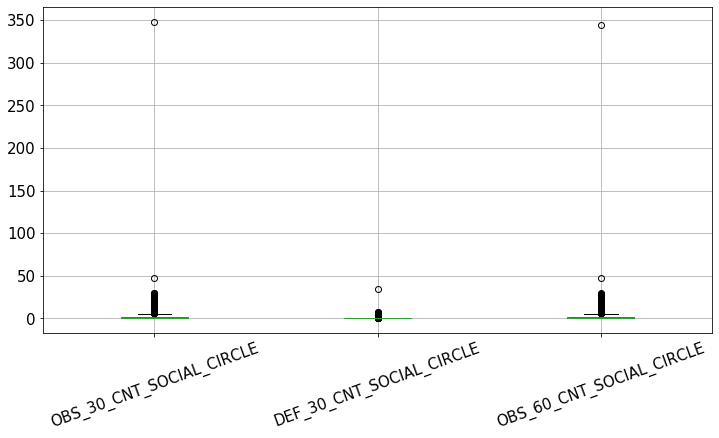

In [13]:
# defining ouliers

df.boxplot(column=['OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE'], 
                     figsize=(12,6), rot=20, fontsize=15)

In [14]:
# Checking if the column is catagorical or continuous for binning

for i in df.columns:
    print(df[i].value_counts())

100303    1
131861    1
158488    1
156441    1
160539    1
         ..
255446    1
257495    1
234968    1
237017    1
100401    1
Name: SK_ID_CURR, Length: 307511, dtype: int64
0    282686
1     24825
Name: TARGET, dtype: int64
Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64
F      202448
M      105059
XNA         4
Name: CODE_GENDER, dtype: int64
N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64
Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64
0     215371
1      61119
2      26749
3       3717
4        429
5         84
6         21
7          7
14         3
19         2
12         2
10         2
9          2
8          2
11         1
Name: CNT_CHILDREN, dtype: int64
135000.0    35750
112500.0    31019
157500.0    26556
180000.0    24719
90000.0     22483
            ...  
101119.5        1
79425.0         1
101128.5        1
202275.0        1
262174.5        1
Name: AMT_INCOME_TOTAL, Length: 2548, dtype: int64
450000.0   

Name: OBS_60_CNT_SOCIAL_CIRCLE, dtype: int64
0.0     281742
1.0      21841
2.0       3170
3.0        598
4.0        135
5.0         20
6.0          3
24.0         1
7.0          1
Name: DEF_60_CNT_SOCIAL_CIRCLE, dtype: int64
 0.0       37672
-1.0        2812
-2.0        2318
-3.0        1763
-4.0        1285
           ...  
-3558.0        1
-3978.0        1
-3701.0        1
-3809.0        1
-3731.0        1
Name: DAYS_LAST_PHONE_CHANGE, Length: 3773, dtype: int64
0    307498
1        13
Name: FLAG_DOCUMENT_2, dtype: int64
1    218340
0     89171
Name: FLAG_DOCUMENT_3, dtype: int64
0    307486
1        25
Name: FLAG_DOCUMENT_4, dtype: int64
0    302863
1      4648
Name: FLAG_DOCUMENT_5, dtype: int64
0    280433
1     27078
Name: FLAG_DOCUMENT_6, dtype: int64
0    307452
1        59
Name: FLAG_DOCUMENT_7, dtype: int64
0    282487
1     25024
Name: FLAG_DOCUMENT_8, dtype: int64
0    306313
1      1198
Name: FLAG_DOCUMENT_9, dtype: int64
0    307504
1         7
Name: FLAG_DOCUMENT_10, dty

In [15]:
# For Binning, we have selected 2 variables (REGION_POPULATION_RELATIVE, CNT_FAM_MEMBERS ).

bin_list = [0.0, .01, 0.1, 1.]
bin_labels = ['Less Poppulated', 'Medium Poppulated', 'Highly Poppulated']
df['Poppulation_level'] = pd.cut(df['REGION_POPULATION_RELATIVE'], bins=bin_list, labels=bin_labels)

bin_list = [0, 4, 10, 20]
bin_labels = ['Small Family', 'Medium Family', 'Large Family']
df['Family Size'] = pd.cut(df['CNT_FAM_MEMBERS'], bins=bin_list, labels=bin_labels)

df[['REGION_POPULATION_RELATIVE','Poppulation_level','CNT_FAM_MEMBERS', 'Family Size']]

,REGION_POPULATION_RELATIVE,Poppulation_level,CNT_FAM_MEMBERS,Family Size
0,0.018801,Medium Poppulated,1.0,Small Family
1,0.003541,Less Poppulated,2.0,Small Family
2,0.010032,Medium Poppulated,1.0,Small Family
3,0.008019,Less Poppulated,2.0,Small Family
4,0.028663,Medium Poppulated,1.0,Small Family
...,...,...,...,...
307506,0.032561,Medium Poppulated,1.0,Small Family
307507,0.025164,Medium Poppulated,1.0,Small Family
307508,0.005002,Less Poppulated,1.0,Small Family
307509,0.005313,Less Poppulated,2.0,Small Family


In [16]:
# Selecting relevant Columns for CASE STUDY

df = df.loc[:,:'DAYS_ID_PUBLISH']

In [17]:
# Checking the Structure of data after cleaning

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 21 columns):
SK_ID_CURR                    307511 non-null int64
TARGET                        307511 non-null int64
NAME_CONTRACT_TYPE            307511 non-null object
CODE_GENDER                   307511 non-null object
FLAG_OWN_CAR                  307511 non-null object
FLAG_OWN_REALTY               307511 non-null object
CNT_CHILDREN                  307511 non-null int64
AMT_INCOME_TOTAL              307511 non-null float64
AMT_CREDIT                    307511 non-null float64
AMT_ANNUITY                   307499 non-null float64
AMT_GOODS_PRICE               307511 non-null float64
NAME_TYPE_SUITE               306219 non-null object
NAME_INCOME_TYPE              307511 non-null object
NAME_EDUCATION_TYPE           307511 non-null object
NAME_FAMILY_STATUS            307511 non-null object
NAME_HOUSING_TYPE             307511 non-null object
REGION_POPULATION_RELATIVE    307511 non

In [18]:
#Imbalance Percentage

#Target = 1
round(100*(df['TARGET'].sum()/len(df['TARGET'].index)),2)

8.07

In [19]:
#Target = 0
print(100-round(100*(df['TARGET'].sum()/len(df['TARGET'].index)),2))

91.93


In [20]:
# Dividing DataFrame into 2 datasets for Target 1 and 0

df_1 = df.loc[df.TARGET == 1]
df_0 = df.loc[df.TARGET == 0]

In [21]:
df_1.shape

(24825, 21)

In [22]:
df_0.shape

(282686, 21)

# Univariate analysis for categorical variables for both Target 0 and 1. 
# Below are the Comparison of the target variable across categories of categorical variables. Left plot is for defaulter in all plots.

[Text(0, 0, 'Cash loans'), Text(0, 0, 'Revolving loans')]

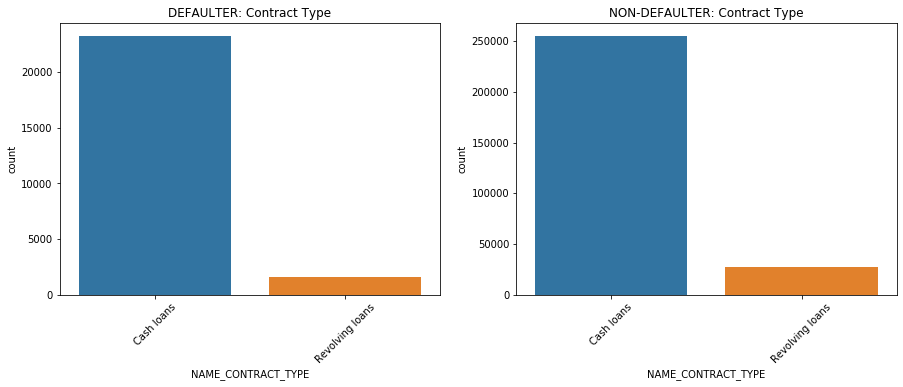

In [23]:
#NAME_CONTRACT_TYPE: Loan type for both Defaulter and Non Defaulter have as cash loans.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x1 = sns.countplot(x = 'NAME_CONTRACT_TYPE', data  =df_1)
plt.title("DEFAULTER: Contract Type")
plt.subplot(1,2,2)
x2 = sns.countplot(x = 'NAME_CONTRACT_TYPE', data = df_0)
plt.title("NON-DEFAULTER: Contract Type")
x1.set_xticklabels(x1.get_xticklabels(), rotation = 45)
x2.set_xticklabels(x1.get_xticklabels(), rotation = 45)

[Text(0, 0, 'Single / not married'),
 Text(0, 0, 'Widow'),
 Text(0, 0, 'Married'),
 Text(0, 0, 'Civil marriage'),
 Text(0, 0, 'Separated')]

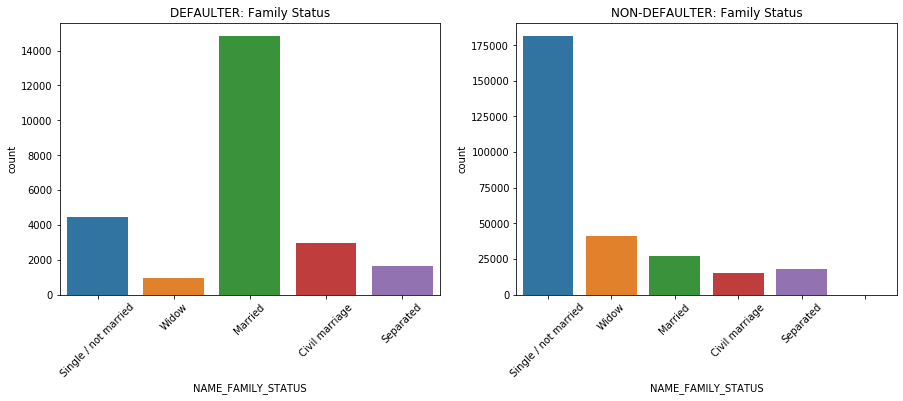

In [24]:
# NAME_FAMILY_STATUS: Married people are more likely to be Defaulter 
# and single/not married are more likely to be Non Defaulter.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x1 = sns.countplot(x = 'NAME_FAMILY_STATUS', data  =df_1)
plt.title("DEFAULTER: Family Status")
plt.subplot(1,2,2)
x2 = sns.countplot(x = 'NAME_FAMILY_STATUS', data = df_0)
plt.title("NON-DEFAULTER: Family Status")
x1.set_xticklabels(x1.get_xticklabels(), rotation = 45)
x2.set_xticklabels(x1.get_xticklabels(), rotation = 45)

Text(0.5, 1.0, 'NON-DEFAULTER: Gender')

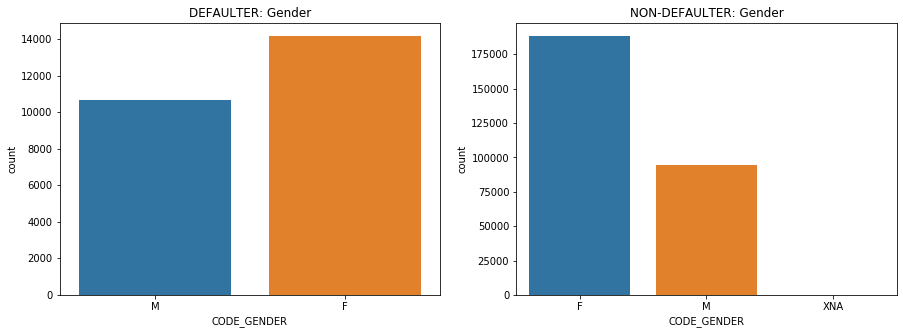

In [25]:
# CODE_GENDER: Most Females are Defaulter and most males are Non Defaulter.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.countplot(x = 'CODE_GENDER', data  =df_1)
plt.title("DEFAULTER: Gender")
plt.subplot(1,2,2)
sns.countplot(x = 'CODE_GENDER', data = df_0)
plt.title("NON-DEFAULTER: Gender")

[Text(0, 0, 'Secondary / secondary special'),
 Text(0, 0, 'Incomplete higher'),
 Text(0, 0, 'Higher education'),
 Text(0, 0, 'Lower secondary'),
 Text(0, 0, 'Academic degree')]

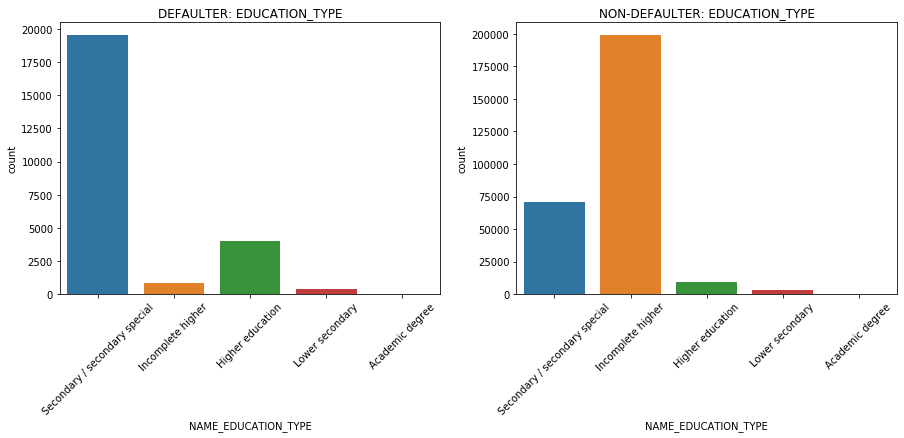

In [26]:
# NAME_EDUCATION_TYPE: Secondary specials educated are mostly like to be Defaulter 
# and Incomplete Higher Education are mostly Non Defaulter.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x1 = sns.countplot(x = 'NAME_EDUCATION_TYPE', data  =df_1)
plt.title("DEFAULTER: EDUCATION_TYPE")
plt.subplot(1,2,2)
x2 = sns.countplot(x = 'NAME_EDUCATION_TYPE', data = df_0)
plt.title("NON-DEFAULTER: EDUCATION_TYPE")
x1.set_xticklabels(x1.get_xticklabels(), rotation = 45)
x2.set_xticklabels(x1.get_xticklabels(), rotation = 45)

[Text(0, 0, 'Working'),
 Text(0, 0, 'Commercial associate'),
 Text(0, 0, 'Pensioner'),
 Text(0, 0, 'State servant'),
 Text(0, 0, 'Unemployed'),
 Text(0, 0, 'Maternity leave')]

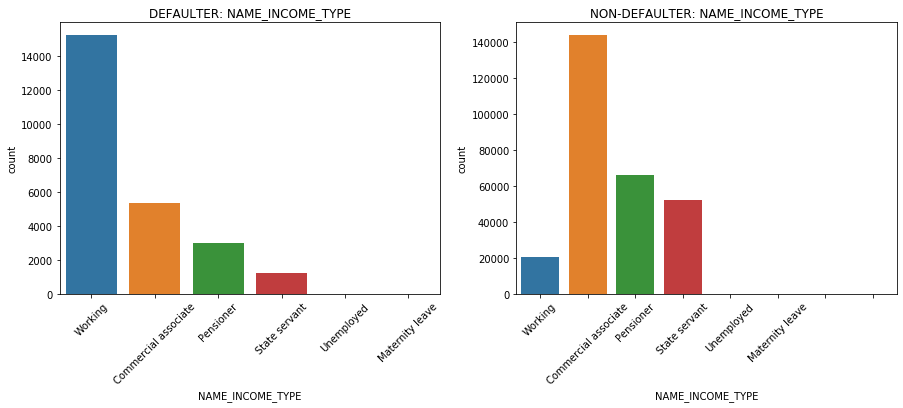

In [27]:
# NAME_INCOME_TYPE: Working Income type people are mostly defaulter 
# and Commercial income people are mostly Non Defaulter.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x1 = sns.countplot(x = 'NAME_INCOME_TYPE', data  =df_1)
plt.title("DEFAULTER: NAME_INCOME_TYPE")
plt.subplot(1,2,2)
x2 =sns.countplot(x = 'NAME_INCOME_TYPE', data = df_0)
plt.title("NON-DEFAULTER: NAME_INCOME_TYPE")
x1.set_xticklabels(x1.get_xticklabels(), rotation = 45)
x2.set_xticklabels(x1.get_xticklabels(), rotation = 45)

# Univariate analysis for Continous variables for both Target 0 and 1. 
# Below are the Comparison of the target variable across categories of Numerical variables. Left plot is for defaulter in all plots.

Text(0.5, 1.0, 'NON-DEFAULTER: Children Count')

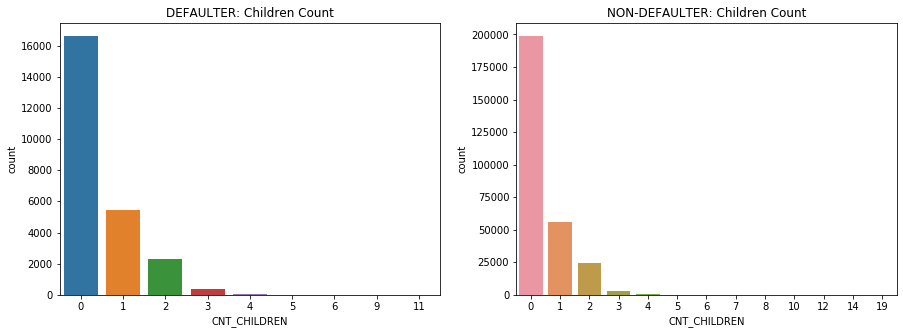

In [28]:
# CNT_CHILDREN: Mostly Defaulter and Non-Defaulter have same childrens i.e. 0.

plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
x1 = sns.countplot(x = 'CNT_CHILDREN', data  =df_1)
plt.title("DEFAULTER: Children Count")
plt.subplot(1,2,2)
x2 =sns.countplot(x = 'CNT_CHILDREN', data = df_0)
plt.title("NON-DEFAULTER: Children Count")

Text(0.5, 1.0, 'NON-DEFAULTER: Credit Amount')

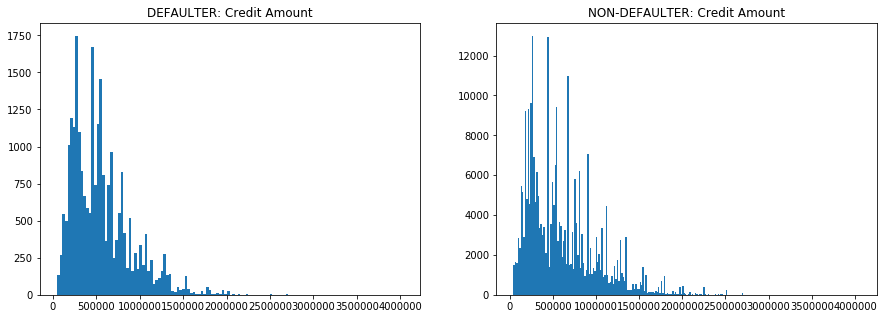

In [29]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(df_1['AMT_CREDIT'], bins='auto')
plt.title("DEFAULTER: Credit Amount")
plt.subplot(1,2,2)
plt.hist(df_0['AMT_CREDIT'], bins='auto')
plt.title("NON-DEFAULTER: Credit Amount")

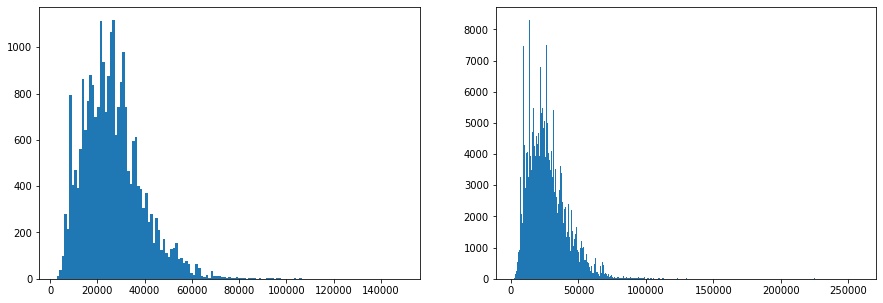

In [30]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
plt.hist(df_1['AMT_ANNUITY'], bins='auto');
plt.subplot(1,2,2)
plt.hist(df_0['AMT_ANNUITY'], bins='auto');

# To show the top 10 correlation for the Client with payment difficulties and all other cases (Target variable), We have used HEATMAP for Defaulter and Non-Defaulter. 

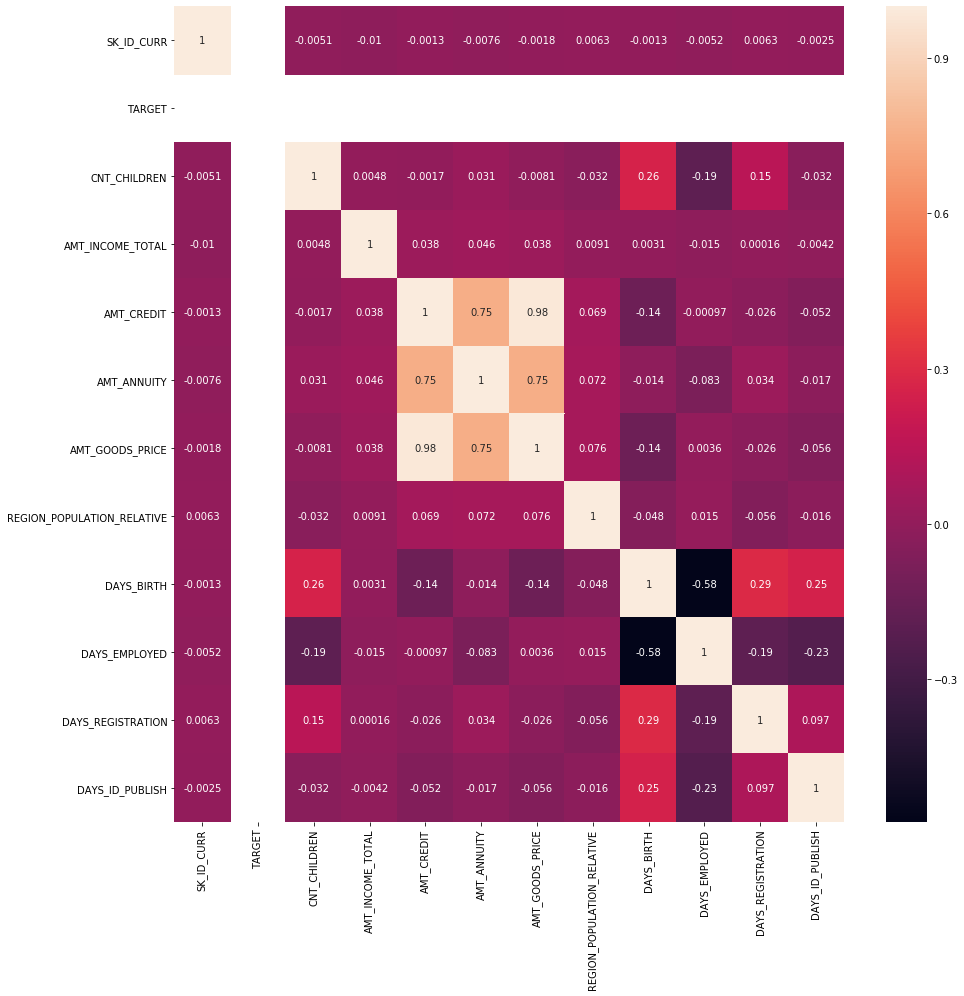

In [31]:
num = ['int64', 'float64']
df_1_columns = df_1.select_dtypes(include = num)
df_1_corr = df_1_columns.corr()
fig = plt.figure(figsize = (15,15))
ax = sns.heatmap(df_1_corr, annot =True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig.savefig('defaulter_corr.jpg')

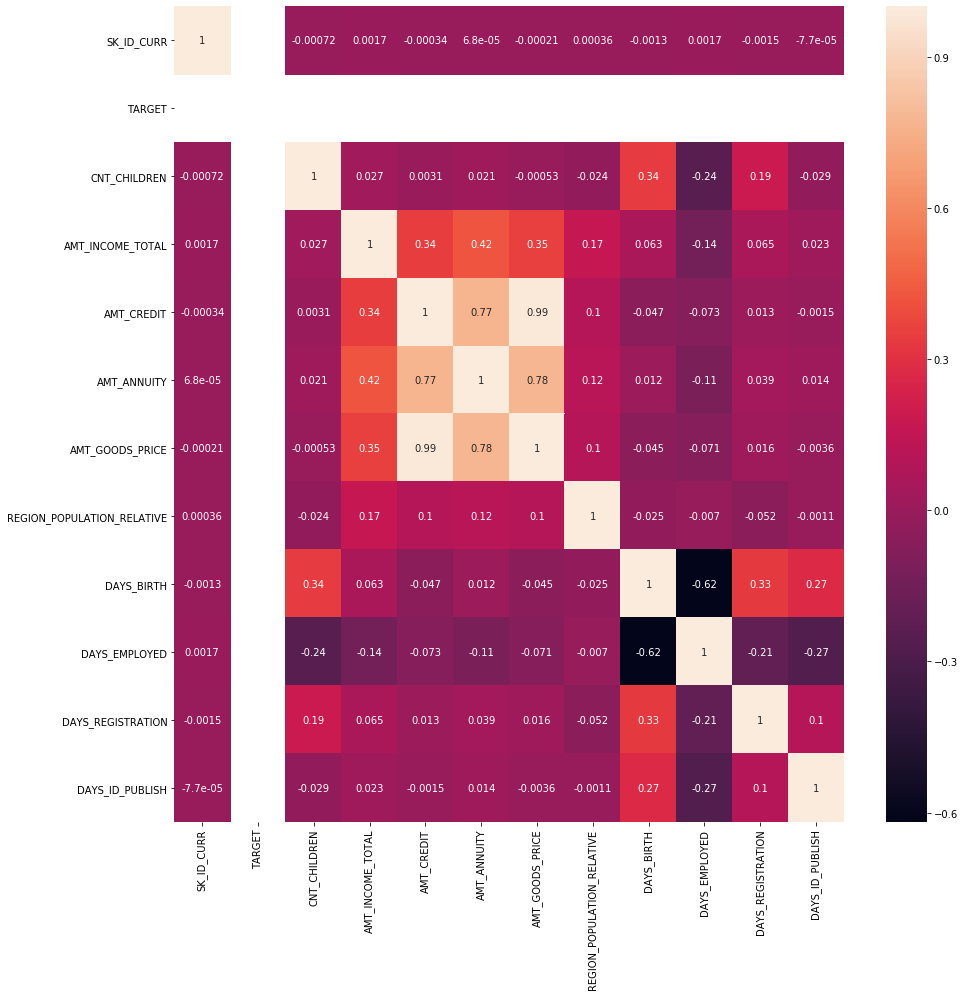

In [32]:
num = ['int64', 'float64']
df_0_columns = df_0.select_dtypes(include = num)
df_0_corr = df_0_columns.corr()
fig = plt.figure(figsize = (15,15))
ax = sns.heatmap(df_0_corr, annot =True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
fig.savefig('Non-Defaulter_corr.jpg')

# Bivariate analysis for variables for both Target 0 and 1. 
# Below are the Comparison of the target variable across categories of variables. Left plot is for defaulter in all plots.

Text(0.5, 1.0, 'NON-DEFAULTER: Contract TYPE VS Amount Credit')

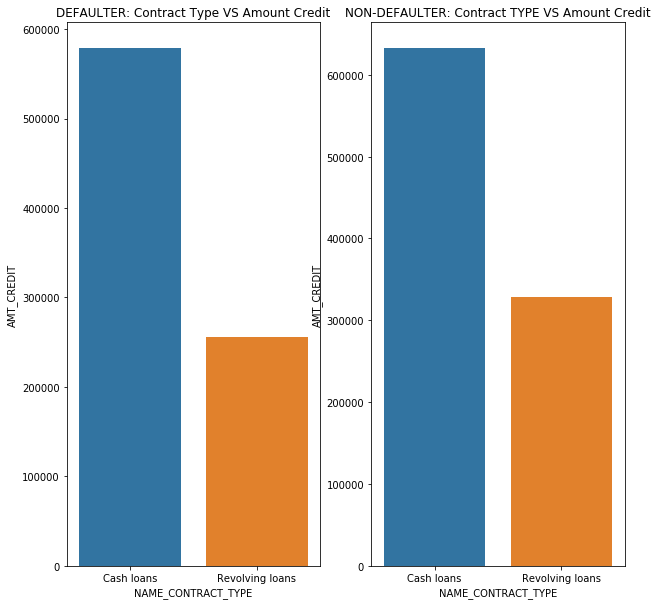

In [33]:
#Contract Type VS Amount Credit: For Cash loan types defaulter have Less Credited amount compare to Non-defaulter.

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
sns.barplot(x='NAME_CONTRACT_TYPE',y='AMT_CREDIT',data= df_1,ci= False)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_CREDIT")
plt.title("DEFAULTER: Contract Type VS Amount Credit")
plt.subplot(1,2,2)
sns.barplot(x='NAME_CONTRACT_TYPE',y='AMT_CREDIT',data= df_0, ci= False)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_CREDIT")
plt.title("NON-DEFAULTER: Contract TYPE VS Amount Credit")

[Text(0, 0, 'Secondary / secondary special'),
 Text(0, 0, 'Incomplete higher'),
 Text(0, 0, 'Higher education'),
 Text(0, 0, 'Lower secondary'),
 Text(0, 0, 'Academic degree')]

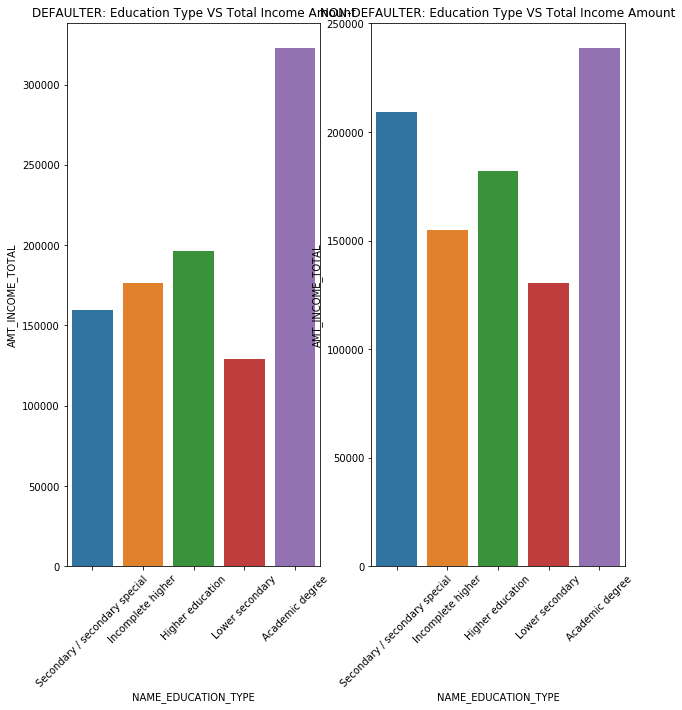

In [34]:
# Education Type VS Total Income: For Defaulter and Non Defaulter Academic Degree people are having more total Income compare to other educated person.

plt.figure(figsize=(10,10))

plt.subplot(1,2,1)
x1 = sns.barplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data= df_1,ci= False)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
plt.title("DEFAULTER: Education Type VS Total Income Amount")
plt.subplot(1,2,2)
x2 = sns.barplot(x='NAME_EDUCATION_TYPE',y='AMT_INCOME_TOTAL',data= df_0, ci= False)
plt.xlabel("NAME_EDUCATION_TYPE")
plt.ylabel("AMT_INCOME_TOTAL")
plt.title("NON-DEFAULTER: Education Type VS Total Income Amount")

x1.set_xticklabels(x1.get_xticklabels(), rotation = 45)
x2.set_xticklabels(x1.get_xticklabels(), rotation = 45)

In [35]:
# Reading previous_application.csv for CASE STUDY

df_prev = pd.read_csv('previous_application.csv')
df_prev.head()

,SK_ID_PREV,SK_ID_CURR,NAME_CONTRACT_TYPE,AMT_ANNUITY,AMT_APPLICATION,AMT_CREDIT,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,FLAG_LAST_APPL_PER_CONTRACT,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,RATE_INTEREST_PRIVILEGED,NAME_CASH_LOAN_PURPOSE,NAME_CONTRACT_STATUS,DAYS_DECISION,NAME_PAYMENT_TYPE,CODE_REJECT_REASON,NAME_TYPE_SUITE,NAME_CLIENT_TYPE,NAME_GOODS_CATEGORY,NAME_PORTFOLIO,NAME_PRODUCT_TYPE,CHANNEL_TYPE,SELLERPLACE_AREA,NAME_SELLER_INDUSTRY,CNT_PAYMENT,NAME_YIELD_GROUP,PRODUCT_COMBINATION,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_LAST_DUE,DAYS_TERMINATION,NFLAG_INSURED_ON_APPROVAL
0,2030495,271877,Consumer loans,1730.430,17145.0,17145.0,0.0,17145.0,SATURDAY,15,Y,1,0.0,0.182832,0.867336,XAP,Approved,-73,Cash through the bank,XAP,NaN,Repeater,Mobile,POS,XNA,Country-wide,35,Connectivity,12.0,middle,POS mobile with interest,365243.0,-42.0,300.0,-42.0,-37.0,0.0
1,2802425,108129,Cash loans,25188.615,607500.0,679671.0,NaN,607500.0,THURSDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-164,XNA,XAP,Unaccompanied,Repeater,XNA,Cash,x-sell,Contact center,-1,XNA,36.0,low_action,Cash X-Sell: low,365243.0,-134.0,916.0,365243.0,365243.0,1.0
2,2523466,122040,Cash loans,15060.735,112500.0,136444.5,NaN,112500.0,TUESDAY,11,Y,1,NaN,NaN,NaN,XNA,Approved,-301,Cash through the bank,XAP,"Spouse, partner",Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,high,Cash X-Sell: high,365243.0,-271.0,59.0,365243.0,365243.0,1.0
3,2819243,176158,Cash loans,47041.335,450000.0,470790.0,NaN,450000.0,MONDAY,7,Y,1,NaN,NaN,NaN,XNA,Approved,-512,Cash through the bank,XAP,NaN,Repeater,XNA,Cash,x-sell,Credit and cash offices,-1,XNA,12.0,middle,Cash X-Sell: middle,365243.0,-482.0,-152.0,-182.0,-177.0,1.0
4,1784265,202054,Cash loans,31924.395,337500.0,404055.0,NaN,337500.0,THURSDAY,9,Y,1,NaN,NaN,NaN,Repairs,Refused,-781,Cash through the bank,HC,NaN,Repeater,XNA,Cash,walk-in,Credit and cash offices,-1,XNA,24.0,high,Cash Street: high,NaN,NaN,NaN,NaN,NaN,NaN


# Univariate analysis for variables of Previous Application Data
# Below are the analysis of variables for Previous Application Data.

[Text(0, 0, 'SATURDAY'),
 Text(0, 0, 'THURSDAY'),
 Text(0, 0, 'TUESDAY'),
 Text(0, 0, 'MONDAY'),
 Text(0, 0, 'FRIDAY'),
 Text(0, 0, 'SUNDAY'),
 Text(0, 0, 'WEDNESDAY')]

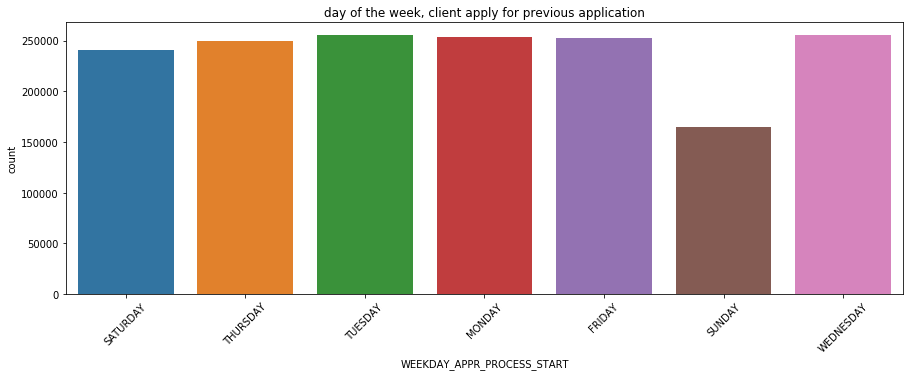

In [36]:
# WEEKDAY_APPR_PROCESS_START: Sunday was the day when less application applied in previous applicaiton.

plt.figure(figsize=(15,5))
x1 = sns.countplot(x = 'WEEKDAY_APPR_PROCESS_START', data  =df_prev)
plt.title("day of the week, client apply for previous application")
x1.set_xticklabels(x1.get_xticklabels(), rotation = 45)

Text(0.5, 1.0, 'Contract status of previous application')

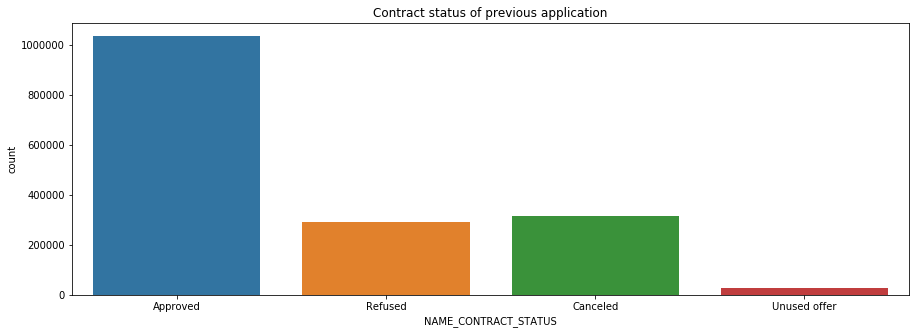

In [37]:
# NAME_CONTRACT_STATUS: As per shown in graph, mostly application approved last time,.
# But compare to refused, Cancelled were more.

plt.figure(figsize=(15,5))
x2 = sns.countplot(x = 'NAME_CONTRACT_STATUS', data = df_prev)
plt.title("Contract status of previous application")

Text(0.5, 1.0, 'Payment method that chose to pay for the previous application')

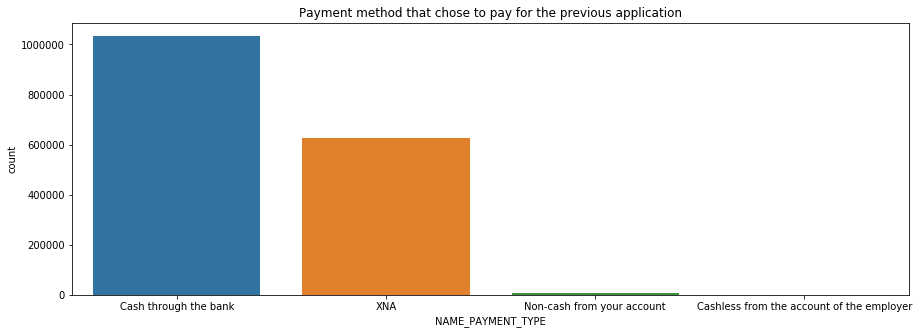

In [38]:
# NAME_PAYMENT_TYPE: As per shown in graph, mostly customers payed their prev application
# amount in Cash and mostly others didnt declare their payment method.

plt.figure(figsize=(15,5))
x2 = sns.countplot(x = 'NAME_PAYMENT_TYPE', data = df_prev)
plt.title("Payment method that chose to pay for the previous application")

Text(0.5, 1.0, 'Through which channel client was acquired on the previous application')

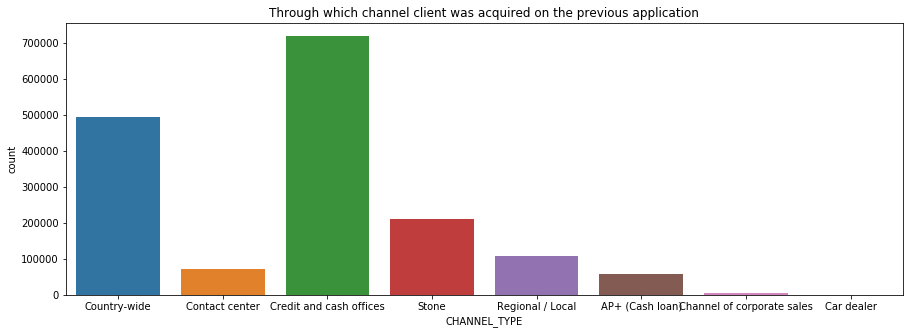

In [39]:
# CHANNEL_TYPE: As per shown in graph, mostly customers aquired on the previous application through Credit and Cash offices 

plt.figure(figsize=(15,5))
x2 = sns.countplot(x = 'CHANNEL_TYPE', data = df_prev)
plt.title("Through which channel client was acquired on the previous application")


# Bivariate analysis for variables of Previous Application Data
# Below are the analysis of variables for Previous Application Data.

[Text(0, 0, 'XAP'),
 Text(0, 0, 'XNA'),
 Text(0, 0, 'Repairs'),
 Text(0, 0, 'Everyday expenses'),
 Text(0, 0, 'Car repairs'),
 Text(0, 0, 'Building a house or an annex'),
 Text(0, 0, 'Other'),
 Text(0, 0, 'Journey'),
 Text(0, 0, 'Purchase of electronic equipment'),
 Text(0, 0, 'Medicine'),
 Text(0, 0, 'Payments on other loans'),
 Text(0, 0, 'Urgent needs'),
 Text(0, 0, 'Buying a used car'),
 Text(0, 0, 'Buying a new car'),
 Text(0, 0, 'Buying a holiday home / land'),
 Text(0, 0, 'Education'),
 Text(0, 0, 'Buying a home'),
 Text(0, 0, 'Furniture'),
 Text(0, 0, 'Buying a garage'),
 Text(0, 0, 'Business development'),
 Text(0, 0, 'Wedding / gift / holiday'),
 Text(0, 0, 'Hobby'),
 Text(0, 0, 'Gasification / water supply'),
 Text(0, 0, 'Refusal to name the goal'),
 Text(0, 0, 'Money for a third person')]

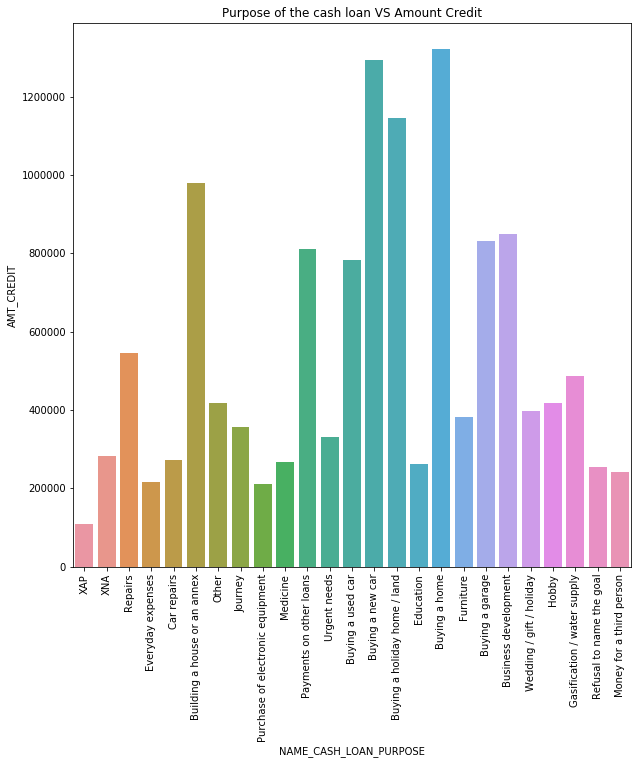

In [40]:
#Purpose of the cash loan VS Amount Credit: Amount credited for Most of the Cash loans for the Buying a home.

plt.figure(figsize=(10,10))

x4 = sns.barplot(x='NAME_CASH_LOAN_PURPOSE',y='AMT_CREDIT',data= df_prev,ci= False)
plt.xlabel("NAME_CASH_LOAN_PURPOSE")
plt.ylabel("AMT_CREDIT")
plt.title("Purpose of the cash loan VS Amount Credit")
x4.set_xticklabels(x4.get_xticklabels(), rotation = 90)

[Text(0, 0, 'Approved'),
 Text(0, 0, 'Refused'),
 Text(0, 0, 'Canceled'),
 Text(0, 0, 'Unused offer')]

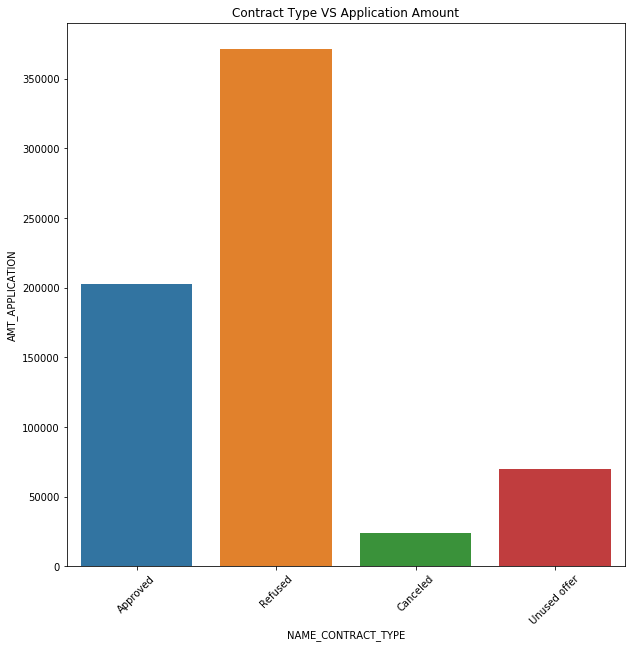

In [41]:
# Contract Type VS Application Amount: Application amount for refused applications are more high.

plt.figure(figsize=(10,10))

x5 =sns.barplot(x='NAME_CONTRACT_STATUS',y='AMT_CREDIT',data= df_prev,ci= False)
plt.xlabel("NAME_CONTRACT_TYPE")
plt.ylabel("AMT_APPLICATION")
plt.title("Contract Type VS Application Amount")
x5.set_xticklabels(x5.get_xticklabels(), rotation = 45)

# MERGING OF 2 Dataframes into 1 file
# There will be some cases when a customer applying for Credit loan for first time or any person who applied for loan in past but he is not applying this time. So Will use Left outer join as Previous Applications file will have data for all the customers which are not present in Current file. Will use SK_ID_CURR as key column.

In [42]:
df_merge= pd.merge(df, df_prev, on='SK_ID_CURR', how='left')
df.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,351000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.018801,-9461,-637,-3648.0,-2120
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,1129500.0,Family,State servant,Higher education,Married,House / apartment,0.003541,-16765,-1188,-1186.0,-291
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,135000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.010032,-19046,-225,-4260.0,-2531
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,297000.0,Unaccompanied,Working,Secondary / secondary special,Civil marriage,House / apartment,0.008019,-19005,-3039,-9833.0,-2437
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,513000.0,Unaccompanied,Working,Secondary / secondary special,Single / not married,House / apartment,0.028663,-19932,-3038,-4311.0,-3458
